In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from math import sqrt
from math import log2
import time
%matplotlib inline

# load different classifieres
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier as RFC


from sklearn.model_selection import train_test_split

# evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# preprocessing 
from sklearn.preprocessing import StandardScaler,PowerTransformer,MinMaxScaler,QuantileTransformer,normalize
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA

# for selection the right path
import os,sys,inspect,pathlib
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

# load my functions
import amazon_processor
import amazon_classificators

from common import misc
from common.data_parser import *
from common.model_trainer import *
from common.misc import *
from config import *

In [2]:
module_path = pathlib.Path(os.getcwd()).parent
if str(module_path) not in sys.path:
    sys.path.append(str(module_path))
print(sys.path)

from common.dataset_grabber import get_data_path

['/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex1', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex1', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex1/amazon', '', '/home/alexander/ngsuite/ngsolve-install/lib/python3/dist-packages', '/home/alexander/ngsuite/ngsolve-install/bin', '/home/alexander/.local/bin', '/usr/local/sbin', '/usr/local/bin', '/usr/sbin', '/usr/bin', '/sbin', '/bin', '/usr/games', '/usr/local/games', '/snap/bin', '/home/alexander/.vscode/extensions/ms-toolsai.jupyter-2020.11.358541065/pythonFiles', '/home/alexander/.vscode/extensions/ms-toolsai.jupyter-2020.11.358541065/pythonFiles/lib/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/home/alexander/.local/lib/python3.7/site-packages', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/home/alexander/.local/lib/python3.7/site-packages/IPython/extensions', '/home/alexander/.ipython']


In [3]:
datapath_train = get_data_path("Amazon_Review_Data", "amazon_review_ID.shuf.lrn.csv")
display(datapath_train)
datapath_test = get_data_path("Amazon_Review_Data", "amazon_review_ID.shuf.tes.csv")
display(datapath_test)

PosixPath('/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex1/Datasets/Amazon_Review_Data/amazon_review_ID.shuf.lrn.csv')

PosixPath('/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex1/Datasets/Amazon_Review_Data/amazon_review_ID.shuf.tes.csv')

In [4]:
df_train = pd.read_csv(datapath_train).drop("ID",axis = 1)
df_test = pd.read_csv(datapath_test).drop("ID",axis = 1)

df_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000,Class
0,8,6,10,6,7,2,2,2,3,2,...,1,0,0,0,0,0,0,0,0,Chell
1,13,1,13,9,8,8,2,3,2,4,...,4,1,2,1,0,1,0,0,0,Engineer
2,16,7,6,7,9,3,4,2,6,5,...,0,0,0,0,1,0,0,0,0,Grove
3,8,11,10,11,3,7,0,4,2,1,...,0,0,1,0,0,0,2,1,0,Davisson
4,10,11,8,5,3,4,2,5,5,4,...,0,0,0,0,0,0,0,0,0,Wilson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,9,8,5,5,6,2,14,1,4,5,...,0,1,0,0,1,0,1,0,0,Riley
746,6,13,4,6,8,2,7,3,3,2,...,0,0,0,0,1,0,0,0,1,Neal
747,16,11,4,9,9,4,0,3,5,0,...,0,0,0,0,0,1,1,0,4,Messick
748,9,5,4,2,3,7,2,7,1,1,...,0,0,0,0,0,2,0,0,0,Mitchell


In [5]:
feature = df_train.loc[:,'V1':'V10000']
target = df_train.loc[:,'Class':'Class']

In [6]:
pd.unique(target.Class)

array(['Chell', 'Engineer', 'Grove', 'Davisson', 'Wilson', 'Brody',
       'Lovitt', 'Vision', 'Morrison', 'Nigam', 'Johnson', 'Koenig',
       'Mitchell', 'Ashbacher', 'McKee', 'Robert', 'Calvinnme', 'Goonan',
       'Peterson', 'Vernon', 'Merritt', 'Riley', 'Walters', 'Agresti',
       'Lee', 'Kolln', 'Lawyeraau', 'Shea', 'Power', 'Chachra', 'Harp',
       'Chandler', 'Auken', 'Neal', 'Mark', 'Cholette', 'Blankenship',
       'Janson', 'Hayes', 'Taylor', 'Sherwin', 'Bukowsky', 'Corn', 'Dent',
       'Messick', 'Mahlers2nd', 'CFH', 'Cutey', 'Comdet', 'Brown'],
      dtype=object)

# Training

# do not run the next cell !!!!!!!!!!!!!!!!!!

In [7]:
#import time
#results = pd.DataFrame(columns=["Model", "Feature_Selector", "k", "Scaler", "Score", "Trainingstime", "Fittime"])
#results = pd.DataFrame(params)
#model = ["Knn","MLP","RM"]
#score_list = []
#kn = [10,30,60,90,100,120,140,200,300,400,500,600,750]
#selector = ["kBest","PCA"]
#scale = ["standard","minmax","quantil"]
#scale = ["standard"]
#h = 300
#max_k = 10
#for mod in model:
#    print("\t")
#    for sel in selector:
#        for k in kn:
#            for scl in scale:           
#                df_prep = amazon_processor.Preprocessing_Amazon(feature, target,feature_method = sel,scale_method = scl, k = k)
#                X_train, X_valid, Y_train, Y_valid = train_test_split(df_prep, target, test_size=.4)
#                if (mod == "RM"):
#                    start = time.time()
#                    clf = RFC(n_jobs=4, n_estimators=2000, max_features=0.02,bootstrap=True, oob_score=True, max_depth=60, min_samples_leaf=4, min_samples_split=4)
#                    end = time.time()
#                    train_time = end - start
#                if (mod == "MLP"):
#                    start = time.time()
#                    clf = MLP(hidden_layer_sizes=(h),alpha=0.1,activation="relu",solver="adam",max_iter=200)
#                    end = time.time()
#                    train_time = end - start
#                if (mod == "Knn"):
#                    score_list = []
#                    for knn in range(1, max_k):
#                        model = KNN(n_neighbors=knn).fit(X_train, Y_train)
#                        Y_pred = model.predict(X_valid)
#                        score = accuracy_score(Y_valid, Y_pred)
#                        score_list.append(score)
#                    knn = score_list.index(max(score_list))+1
#
#                    start = time.time()
#                    clf = KNN(n_neighbors=knn).fit(X_train, Y_train)
#                    end = time.time()
#                    train_time = end - start
#                       
#
#                start = time.time()
#                clf.fit(X_train, Y_train)
#                end = time.time()
#                fit_time = end - start
#
#                Y_pred = clf.predict(X_valid)
#                score = accuracy_score(Y_valid, Y_pred)
#                print("Model: ",mod, "score: ",score,"k: ",k,"scaler: ",scl, "selector: ",sel)
#                print("Model: ",mod, "Traintime: ",train_time,"fit_time: ",fit_time)
#                results = results.append({'Model': mod, "Feature_Selector": sel, "k": k, "Scaler": scl, "Score": score, "Trainingstime": train_time, "Fittime": fit_time}, ignore_index=True)

In [8]:
results = pd.read_csv("out/expensive_results_amazon.csv")

In [9]:
results

,Model,Feature_Selector,k,Scaler,Score,Trainingstime,Fittime
0,Knn,kBest,10,standard,0.120000,0.005026,0.004699
1,Knn,kBest,10,minmax,0.116667,0.004965,0.004803
2,Knn,kBest,10,quantil,0.116667,0.004920,0.004735
3,Knn,kBest,30,standard,0.216667,0.005554,0.005584
4,Knn,kBest,30,minmax,0.253333,0.005462,0.005419
...,...,...,...,...,...,...,...
229,RM,PCA,600,minmax,0.100000,0.005027,11.767130
230,RM,PCA,600,quantil,0.153333,0.003482,11.927239
231,RM,PCA,750,standard,0.093333,0.004376,13.950729
232,RM,PCA,750,minmax,0.086667,0.004361,15.977343


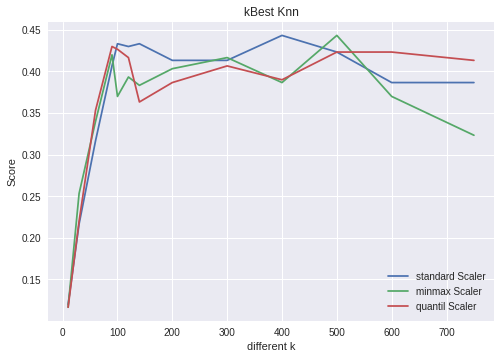

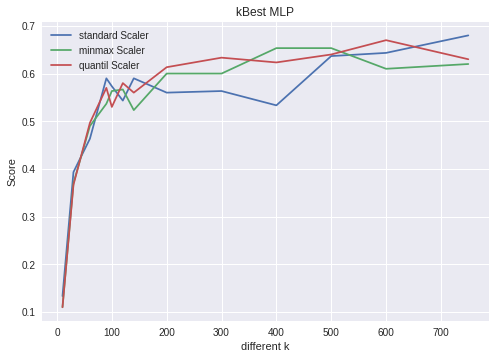

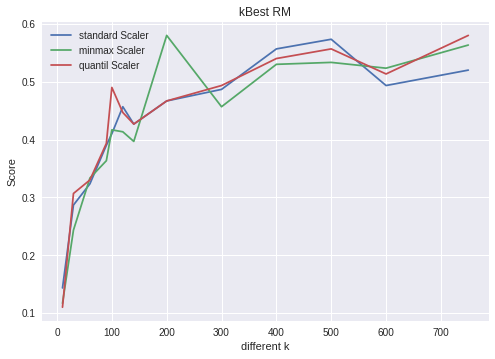

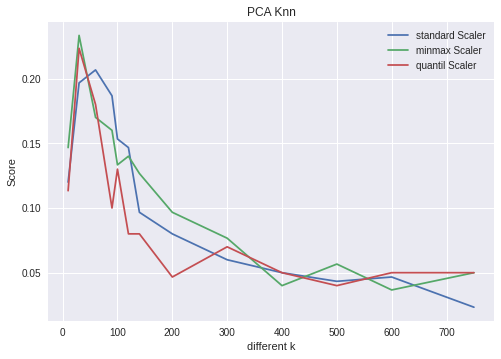

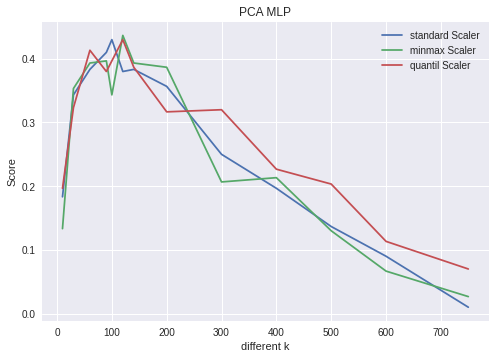

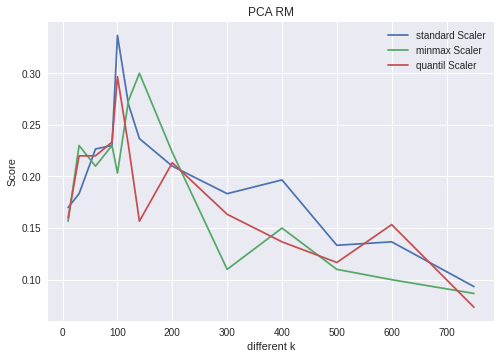

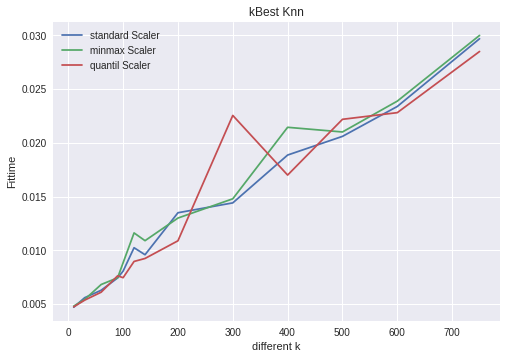

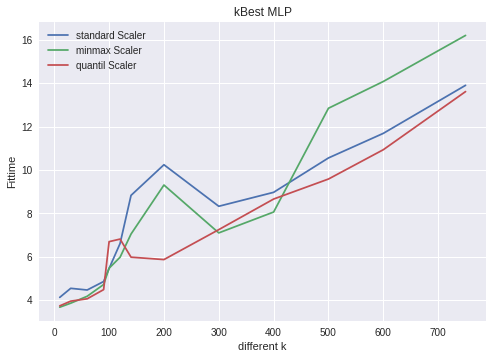

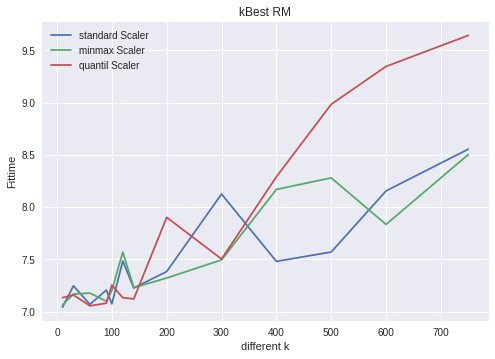

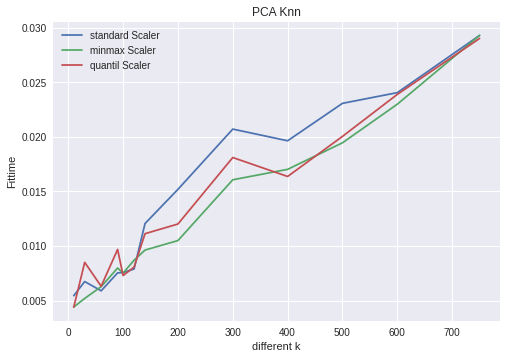

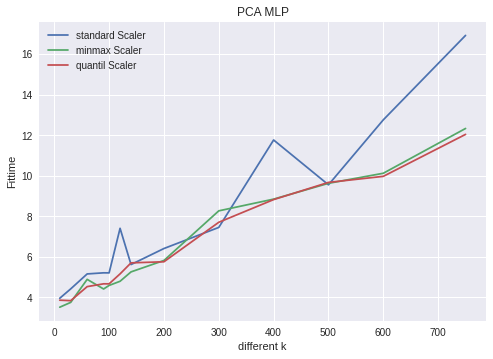

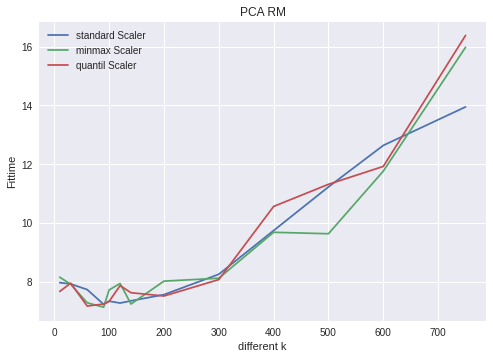

In [10]:
Scaler = ["standard", "minmax", "quantil"]
Model = ["Knn", "MLP", "RM"]
Feature_Selector = ["kBest", "PCA"]
kind = ["Score", "Fittime"]
for ki in kind:
    for feat in Feature_Selector:
        for mod in Model:
            amazon_processor.Plot_preprocessing(results, feat, Scaler, mod, ki)

# MLP Classifierer

In [59]:
MODEL = MLP
MODEL_TYPE = "MLP"
params = {
    "hidden_layer_sizes" : [(10,10),(20,20),(50,50),(100,100),(200,200),(400,400),(500,500),(1000,1000)],
    "alpha" : [1e-2],#,1,10,100], 
    "solver" : ["adam","lbfgs"],
    "activation" : ["tanh", "relu"]
    }
SCORES = "accuracy"
OUT_DIR = f"out/{MODEL_TYPE}/"

fname = OUT_DIR + f"{MODEL_TYPE}_{SCORES}.pdf"

In [12]:
k, scl = amazon_processor.FindBestK_Scaler(results, "MLP")

df_prep = amazon_processor.Preprocessing_Amazon(feature, target,feature_method = "kBest",scale_method = scl.values[0], k = k.values[0])
X_train, X_valid, Y_train, Y_valid = train_test_split(df_prep, target, test_size=0.4, random_state = 42)

In [13]:
LOGX = True
YLIMS = (0.5, 1)


def plot_params(results, scores="score", fileName=None, params=params, ylims=YLIMS):
    param_keys = list(params)
    first_key = param_keys[0]
    rest = param_keys[1:]

    plt.style.use('seaborn')
    if isinstance(scores, str):
        fix, ax = plt.subplots(figsize=(8,6))
        for vals in tuple(itertools.product(*tuple(x for x in tuple(params.values())[1:]))):
            label = " / ".join([str(x) for x in vals])
            filters = " & ".join([str(x)+' == "'+str(v)+'"' for x, v in zip(rest, vals)])
            results.query(filters).plot(
                x=first_key, y=scores, label=label,
                    ax=ax, marker="o", logx=LOGX);
        plt.legend()
        ax.set_title(scores, fontsize=18)

        plt.ylim(*ylims)
        if fileName:
            plt.savefig(fileName)
        plt.show()
        return plt.gcf() 

In [14]:
modeltrainer = ModelTrainer(
    MODEL, 
    params, 
    X_train, Y_train, X_valid, Y_valid, 
    accuracy_score,
    thread_cnt=8
    )
modeltrainer.train()
modeltrainer.save_result("out/mlp_params.csv")
result_MLP = modeltrainer.result

Finished evaluation
Best parameteters found with: {'hidden_layer_sizes': (1000, 1000), 'alpha': 0.01, 'solver': 'adam', 'activation': 'tanh', 'train_time': 214.1146855354309, 'inference_time': 0.07437300682067871, 'accuracy': 0.6366666666666667, 'f1': array([0.75      , 0.44444444, 0.4       , 1.        , 0.        ,
       0.46153846, 0.61538462, 0.66666667, 0.28571429, 0.7       ,
       0.75      , 0.88888889, 0.75      , 0.76923077, 0.26666667,
       0.85714286, 0.7       , 0.44444444, 0.85714286, 0.66666667,
       0.61538462, 1.        , 0.61538462, 0.66666667, 0.83333333,
       0.6       , 0.77777778, 0.25      , 0.5       , 0.54545455,
       0.75      , 0.82352941, 0.71428571, 1.        , 0.4       ,
       0.53333333, 0.88888889, 0.5       , 0.5       , 0.8       ,
       0.61538462, 0.46153846, 0.25      , 0.66666667, 0.76923077,
       1.        , 0.66666667, 0.        , 0.88888889, 0.28571429]), 'recall': array([0.75      , 0.66666667, 0.25      , 1.        , 0.        ,

In [ ]:
for i in range(len(result_MLP)):
    result_MLP["f1"][i] = np.mean(result_MLP["f1"][i])
for i in range(len(result_MLP)):
    result_MLP["recall"][i] = np.mean(result_MLP["recall"][i])
for i in range(len(result_MLP)):
    result_MLP["precision"][i] = np.mean(result_MLP["precision"][i])

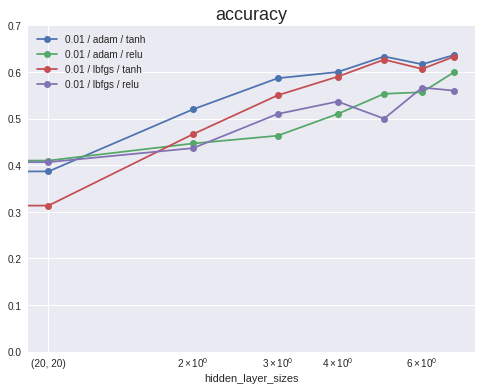

<Figure size 576x396 with 0 Axes>

In [15]:
SCORES = "accuracy"
plot_params(result_MLP, scores=SCORES, fileName=fname,params=params, ylims=(0,0.7));

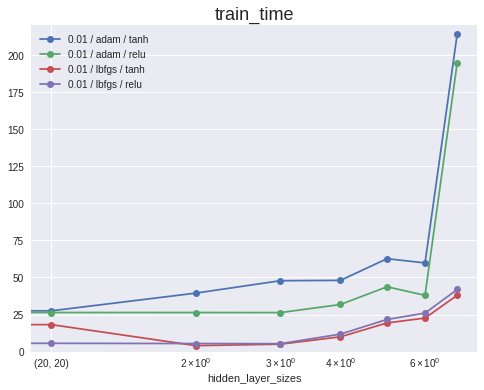

<Figure size 576x396 with 0 Axes>

In [20]:
SCORES = "train_time"
OUT_DIR = f"out/{MODEL_TYPE}/"

fname = OUT_DIR + f"{MODEL_TYPE}_{SCORES}.pdf"
plot_params(result_MLP, scores=SCORES, fileName=fname,params=params, ylims=(0,220));

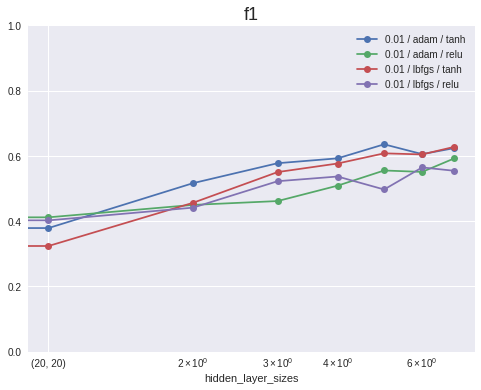

<Figure size 576x396 with 0 Axes>

In [61]:
SCORES = "f1"
OUT_DIR = f"out/{MODEL_TYPE}/"

fname = OUT_DIR + f"{MODEL_TYPE}_{SCORES}.pdf"
plot_params(result_MLP, scores=SCORES, fileName=fname,params=params, ylims=(0,1));

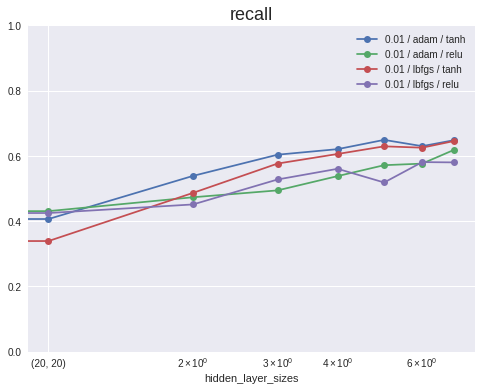

<Figure size 576x396 with 0 Axes>

In [62]:
SCORES = "recall"
OUT_DIR = f"out/{MODEL_TYPE}/"

fname = OUT_DIR + f"{MODEL_TYPE}_{SCORES}.pdf"
plot_params(result_MLP, scores=SCORES, fileName=fname,params=params, ylims=(0,1));

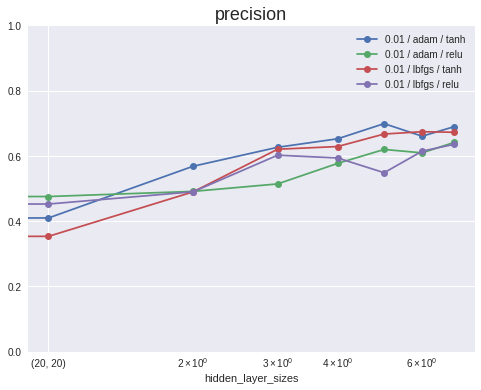

<Figure size 576x396 with 0 Axes>

In [63]:
SCORES = "precision"
OUT_DIR = f"out/{MODEL_TYPE}/"

fname = OUT_DIR + f"{MODEL_TYPE}_{SCORES}.pdf"
plot_params(result_MLP, scores=SCORES, fileName=fname,params=params, ylims=(0,1));

In [57]:
result_MLP

,hidden_layer_sizes,alpha,solver,activation,train_time,inference_time,score,accuracy,f1,recall,precision
0,"(10, 10)",0.01,adam,tanh,24.073280,0.022421,0.230000,0.230000,0.214875,0.26519,0.216859
1,"(10, 10)",0.01,adam,relu,24.902667,0.016940,0.270000,0.270000,0.262438,0.286397,0.310016
2,"(10, 10)",0.01,lbfgs,tanh,12.440167,0.022727,0.213333,0.213333,0.212407,0.237659,0.217655
3,"(10, 10)",0.01,lbfgs,relu,13.638558,0.041470,0.210000,0.210000,0.2212,0.221897,0.264512
4,"(20, 20)",0.01,adam,tanh,27.510072,0.029279,0.386667,0.386667,0.37877,0.406492,0.409711
5,"(20, 20)",0.01,adam,relu,26.361953,0.025718,0.410000,0.410000,0.411702,0.430667,0.475455
6,"(20, 20)",0.01,lbfgs,tanh,18.190975,0.036617,0.313333,0.313333,0.323781,0.338968,0.353353
7,"(20, 20)",0.01,lbfgs,relu,5.596761,0.026805,0.406667,0.406667,0.402306,0.424865,0.452452
8,"(50, 50)",0.01,adam,tanh,39.460761,0.037934,0.520000,0.520000,0.516455,0.538762,0.568226
9,"(50, 50)",0.01,adam,relu,26.353167,0.034144,0.446667,0.446667,0.449793,0.473206,0.491199


In [21]:
df_results_MLP = pd.read_csv("out/mlp_params.csv")

In [22]:
best_params_MLP = amazon_processor.FindBest_Params(df_results_MLP)
best_params_MLP

,hidden_layer_sizes,alpha,solver,activation,train_time,inference_time,score,accuracy,f1,recall,precision
28,"(1000, 1000)",0.01,adam,tanh,214.114686,0.074373,0.636667,0.636667,[0.75 0.44444444 0.4 1. 0...,[0.75 0.66666667 0.25 1. 0...,[0.75 0.33333333 1. 1. 0...


# KNN Classifierer

In [64]:
MODEL = KNN
MODEL_TYPE = "KNN"
params = {
    "n_neighbors" : list(range(1, 200)), 
    "weights" : ["uniform", "distance"],
    "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"]
    }

SCORES = "accuracy"
OUT_DIR = f"out/{MODEL_TYPE}/"

fname = OUT_DIR + f"{MODEL_TYPE}_{SCORES}.pdf"

In [65]:
k, scl = amazon_processor.FindBestK_Scaler(results, "Knn")

df_prep = amazon_processor.Preprocessing_Amazon(feature, target,feature_method = "kBest",scale_method = scl.values[0], k = k.values[0])
X_train, X_valid, Y_train, Y_valid = train_test_split(df_prep, target, test_size=.4, random_state = 42)

In [66]:
modeltrainer = ModelTrainer(
    MODEL, 
    params, 
    X_train, Y_train, X_valid, Y_valid, 
    accuracy_score,
    thread_cnt=8
    )
modeltrainer.train()
modeltrainer.save_result("out/knn_params.csv")
result_KNN = modeltrainer.result

Finished evaluation
Best parameteters found with: {'n_neighbors': 6, 'weights': 'distance', 'algorithm': 'auto', 'train_time': 0.07547593116760254, 'inference_time': 0.42450380325317383, 'accuracy': 0.4033333333333333, 'f1': array([0.4       , 0.33333333, 0.36363636, 1.        , 0.        ,
       0.33333333, 0.4       , 0.4       , 0.        , 0.57142857,
       0.4       , 0.5       , 0.25      , 0.33333333, 0.22222222,
       0.46153846, 0.34782609, 0.5       , 0.4       , 0.2       ,
       0.66666667, 0.85714286, 0.46153846, 0.28571429, 0.83333333,
       0.22222222, 0.66666667, 0.        , 0.18181818, 0.14285714,
       0.71428571, 0.6       , 0.31578947, 1.        , 0.16666667,
       0.11764706, 0.85714286, 0.4       , 0.2       , 0.28571429,
       0.5       , 0.14285714, 0.        , 0.47058824, 0.4       ,
       1.        , 0.4       , 0.25      , 0.33333333, 0.4       ]), 'recall': array([0.25      , 0.66666667, 0.25      , 1.        , 0.        ,
       0.2       , 0.4    

In [67]:
for i in range(len(result_KNN)):
    result_KNN["f1"][i] = np.mean(result_KNN["f1"][i])
for i in range(len(result_KNN)):
    result_KNN["recall"][i] = np.mean(result_KNN["recall"][i])
for i in range(len(result_KNN)):
    result_KNN["precision"][i] = np.mean(result_KNN["precision"][i])

In [68]:
result_KNN

,n_neighbors,weights,algorithm,train_time,inference_time,score,accuracy,f1,recall,precision
0,1,uniform,auto,0.019015,0.225492,0.366667,0.366667,0.376695,0.393667,0.454834
1,1,uniform,ball_tree,0.045468,0.348410,0.366667,0.366667,0.376695,0.393667,0.454834
2,1,uniform,kd_tree,0.094553,0.633635,0.366667,0.366667,0.376695,0.393667,0.454834
3,1,uniform,brute,0.001836,0.187777,0.366667,0.366667,0.376695,0.393667,0.454834
4,1,distance,auto,0.106022,0.435412,0.366667,0.366667,0.376695,0.393667,0.454834
...,...,...,...,...,...,...,...,...,...,...
1587,199,uniform,brute,0.001792,0.167697,0.096667,0.096667,0.0668277,0.0935238,0.114665
1588,199,distance,auto,0.027376,0.607450,0.183333,0.183333,0.169695,0.203048,0.260009
1589,199,distance,ball_tree,0.035213,0.331616,0.183333,0.183333,0.169695,0.203048,0.260009
1590,199,distance,kd_tree,0.023898,0.431059,0.183333,0.183333,0.169695,0.203048,0.260009


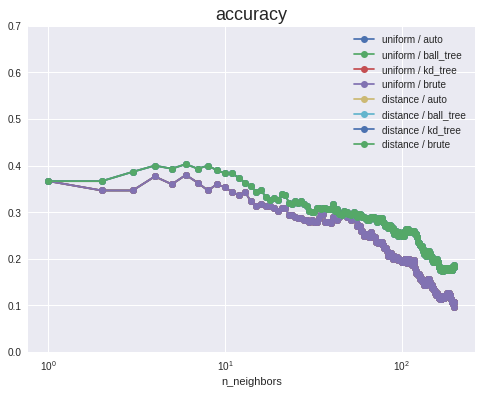

<Figure size 576x396 with 0 Axes>

In [69]:
SCORES = "accuracy"
plot_params(result_KNN, scores=SCORES, fileName=fname,params=params, ylims=(0,0.7));

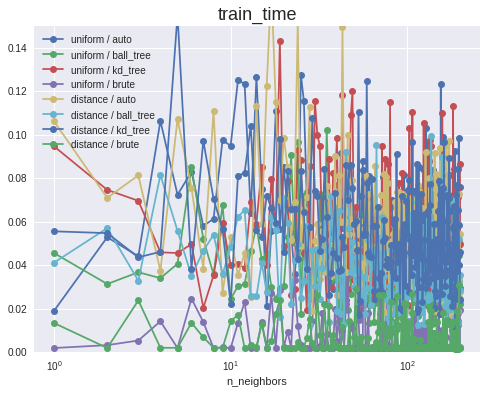

<Figure size 576x396 with 0 Axes>

In [70]:
SCORES = "train_time"
OUT_DIR = f"out/{MODEL_TYPE}/"

fname = OUT_DIR + f"{MODEL_TYPE}_{SCORES}.pdf"
plot_params(result_KNN, scores=SCORES, fileName=fname,params=params, ylims=(0,0.15));

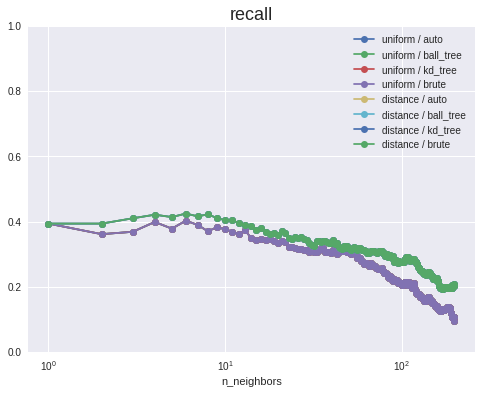

<Figure size 576x396 with 0 Axes>

In [74]:
SCORES = "recall"
OUT_DIR = f"out/{MODEL_TYPE}/"

fname = OUT_DIR + f"{MODEL_TYPE}_{SCORES}.pdf"
plot_params(result_KNN, scores=SCORES, fileName=fname,params=params, ylims=(0,1));

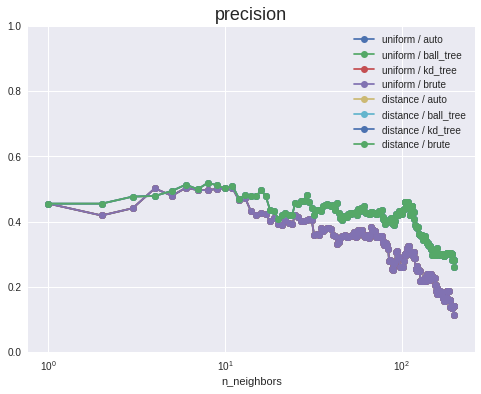

<Figure size 576x396 with 0 Axes>

In [75]:
SCORES = "precision"
OUT_DIR = f"out/{MODEL_TYPE}/"

fname = OUT_DIR + f"{MODEL_TYPE}_{SCORES}.pdf"
plot_params(result_KNN, scores=SCORES, fileName=fname,params=params, ylims=(0,1));

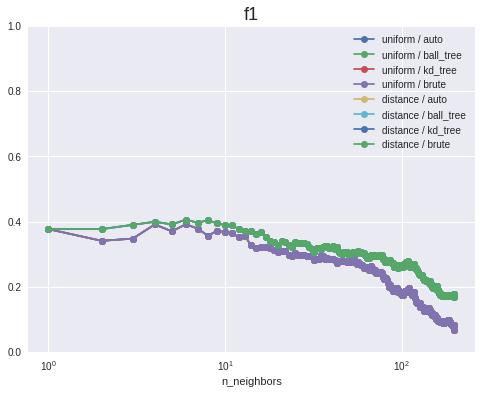

<Figure size 576x396 with 0 Axes>

In [76]:
SCORES = "f1"
OUT_DIR = f"out/{MODEL_TYPE}/"

fname = OUT_DIR + f"{MODEL_TYPE}_{SCORES}.pdf"
plot_params(result_KNN, scores=SCORES, fileName=fname,params=params, ylims=(0,1));

In [77]:
df_results_KNN = pd.read_csv("out/knn_params.csv")

In [78]:
best_params_KNN = amazon_processor.FindBest_Params(df_results_KNN)
best_params_KNN

,n_neighbors,weights,algorithm,train_time,inference_time,score,accuracy,f1,recall,precision
44,6,distance,auto,0.075476,0.424504,0.403333,0.403333,[0.4 0.33333333 0.36363636 1. 0...,[0.25 0.66666667 0.25 1. 0...,[1. 0.22222222 0.66666667 1. 0...
45,6,distance,ball_tree,0.035007,0.322350,0.403333,0.403333,[0.4 0.33333333 0.36363636 1. 0...,[0.25 0.66666667 0.25 1. 0...,[1. 0.22222222 0.66666667 1. 0...
46,6,distance,kd_tree,0.038303,0.423064,0.403333,0.403333,[0.4 0.33333333 0.36363636 1. 0...,[0.25 0.66666667 0.25 1. 0...,[1. 0.22222222 0.66666667 1. 0...
47,6,distance,brute,0.013457,0.042431,0.403333,0.403333,[0.4 0.33333333 0.36363636 1. 0...,[0.25 0.66666667 0.25 1. 0...,[1. 0.22222222 0.66666667 1. 0...


# RandomForrest classifierer

In [79]:
MODEL = RFC
MODEL_TYPE = "RFC"
params = {
    "n_estimators": [1, 8, 10, 12, 15, 20, 50, 100,  1000],
    "max_features": ["sqrt", "log2"],
    "criterion": ["gini", "entropy"]
}
SCORES = "accuracy"
OUT_DIR = f"out/{MODEL_TYPE}/"

fname = OUT_DIR + f"{MODEL_TYPE}_{SCORES}.pdf"

In [80]:
k, scl = amazon_processor.FindBestK_Scaler(results, "RM")

df_prep = amazon_processor.Preprocessing_Amazon(feature, target,feature_method = "kBest",scale_method = scl.values[0], k = k.values[0])
X_train, X_valid, Y_train, Y_valid = train_test_split(df_prep, target, test_size=.4, random_state = 42)

In [81]:
modeltrainer = ModelTrainer(
    MODEL, 
    params, 
    X_train, Y_train, X_valid, Y_valid, 
    accuracy_score,
    thread_cnt=8
    )
modeltrainer.train()
modeltrainer.save_result("out/rf_params.csv")
result_RFC = modeltrainer.result

Finished evaluation
Best parameteters found with: {'n_estimators': 1000, 'max_features': 'sqrt', 'criterion': 'gini', 'train_time': 6.638170480728149, 'inference_time': 0.31580209732055664, 'accuracy': 0.5666666666666667, 'f1': array([0.8       , 0.75      , 0.54545455, 1.        , 0.        ,
       0.33333333, 0.57142857, 0.4       , 0.22222222, 0.54545455,
       0.8       , 0.75      , 0.14285714, 0.4       , 0.33333333,
       0.8       , 0.8       , 0.72727273, 0.33333333, 0.36363636,
       0.42857143, 1.        , 0.63157895, 0.36363636, 0.92307692,
       0.66666667, 0.73684211, 0.44444444, 0.22222222, 0.2       ,
       0.57142857, 0.92307692, 0.375     , 1.        , 0.36363636,
       0.88888889, 0.75      , 0.46153846, 0.        , 0.66666667,
       0.61538462, 0.46153846, 0.42105263, 0.5       , 0.76923077,
       1.        , 0.57142857, 0.        , 0.54545455, 0.28571429]), 'recall': array([0.75      , 1.        , 0.375     , 1.        , 0.        ,
       0.2       , 0.8 

In [82]:
df_results_RFC = pd.read_csv("out/rf_params.csv")

In [83]:
best_params_RFC = amazon_processor.FindBest_Params(df_results_RFC)
best_params_RFC

,n_estimators,max_features,criterion,train_time,inference_time,score,accuracy,f1,recall,precision
32,1000,sqrt,gini,6.63817,0.315802,0.566667,0.566667,[0.8 0.75 0.54545455 1. 0...,[0.75 1. 0.375 1. 0...,[0.85714286 0.6 1. 1. 0...


In [84]:
for i in range(len(result_RFC)):
    result_RFC["f1"][i] = np.mean(result_RFC["f1"][i])
for i in range(len(result_RFC)):
    result_RFC["recall"][i] = np.mean(result_RFC["recall"][i])
for i in range(len(result_RFC)):
    result_RFC["precision"][i] = np.mean(result_RFC["precision"][i])

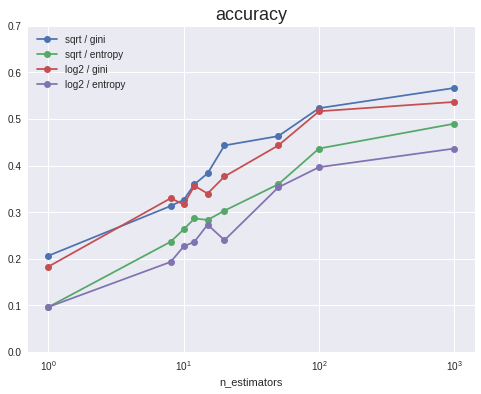

<Figure size 576x396 with 0 Axes>

In [85]:
SCORES = "accuracy"
plot_params(result_RFC, scores=SCORES, fileName=fname,params=params, ylims=(0,0.7));

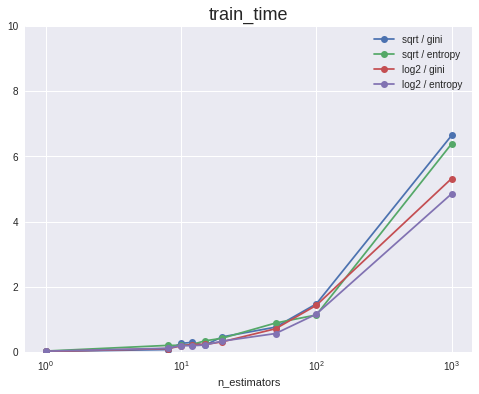

<Figure size 576x396 with 0 Axes>

In [86]:
SCORES = "train_time"
OUT_DIR = f"out/{MODEL_TYPE}/"

fname = OUT_DIR + f"{MODEL_TYPE}_{SCORES}.pdf"
plot_params(result_RFC, scores=SCORES, fileName=fname,params=params, ylims=(0,10));

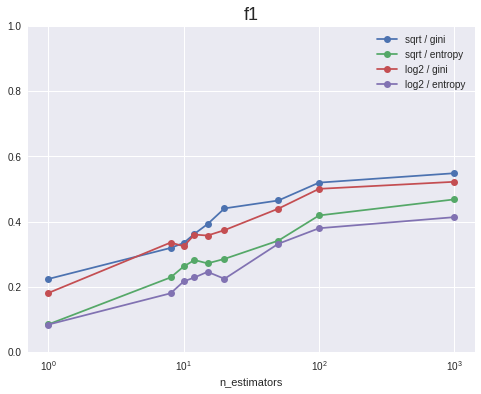

<Figure size 576x396 with 0 Axes>

In [95]:
SCORES = "f1"
OUT_DIR = f"out/{MODEL_TYPE}/"

fname = OUT_DIR + f"{MODEL_TYPE}_{SCORES}.pdf"
plot_params(result_RFC, scores=SCORES, fileName=fname,params=params, ylims=(0,1));

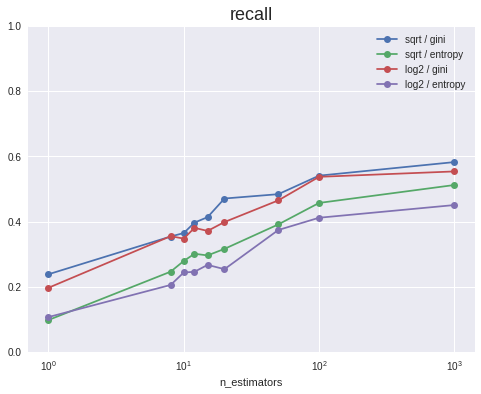

<Figure size 576x396 with 0 Axes>

In [96]:
SCORES = "recall"
OUT_DIR = f"out/{MODEL_TYPE}/"

fname = OUT_DIR + f"{MODEL_TYPE}_{SCORES}.pdf"
plot_params(result_RFC, scores=SCORES, fileName=fname,params=params, ylims=(0,1));

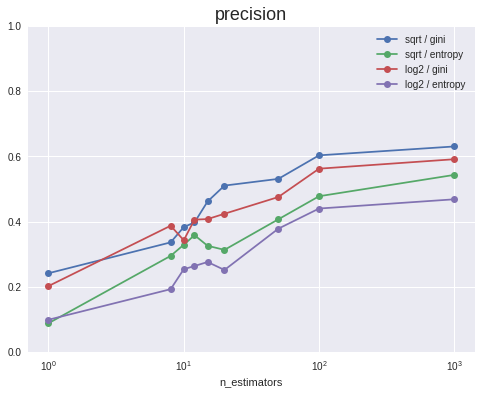

<Figure size 576x396 with 0 Axes>

In [98]:
SCORES = "precision"
OUT_DIR = f"out/{MODEL_TYPE}/"

fname = OUT_DIR + f"{MODEL_TYPE}_{SCORES}.pdf"
plot_params(result_RFC, scores=SCORES, fileName=fname,params=params, ylims=(0,1));

# Statistic

In [ ]:
best_params_RFC

In [ ]:
best_params_KNN

In [ ]:
best_params_MLP

# Filepreparation for the Kagglecompetition

In [ ]:
def plotLC(LC):
    mpl.style.use('seaborn')
    plt.figure()
    plt.grid
    plt.plot(LC)#,label="activation {} Hidden Layers {} solver {} ".format(best_params["alpha"],i,l))
    
    #plt.legend()
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    #plt.title("activation {} Hidden Layers {} solver {} ".format(best_params["mode"],best_params["h"],best_params["solver"]))
    #plt.savefig("figures//wine//LC//activation {} Hidden Layers {} solver {} ".format(best_params["mode"],best_params["h"],best_params["solver"]))

In [ ]:
df_train = pd.read_csv(datapath_train).drop("ID",axis = 1)
df_test = pd.read_csv(datapath_test).drop("ID",axis = 1)

feature = df_train.loc[:,'V1':'V10000']
target = df_train.loc[:,'Class':'Class']

scaler = StandardScaler().fit(feature)
df_train_SC = scaler.transform(feature)


scaler = StandardScaler().fit(df_test)
df_test_SC = scaler.transform(df_test)

In [ ]:
df_test = pd.read_csv(datapath_test).drop("ID",axis = 1)
k, scl = amazon_processor.FindBestK_Scaler(results, "MLP")

df_test_prep = amazon_processor.Preprocessing_Amazon(df_test, target,feature_method = "kBest",scale_method = scl.values[0], k = k.values[0])

h = best_params_MLP["hidden_layer_sizes"].values[0]
activation= best_params_MLP["activation"].values[0]
alpha = best_params_MLP["alpha"].values[0]
solver = best_params_MLP["solver"].values[0]

print(int(h[1:4]))
clf = MLP(hidden_layer_sizes=(900,900,900),alpha=alpha,activation=activation,solver=solver)
clf.fit(df_test_prep,target)
LC = clf.loss_curve_
plotLC(LC)
Y_pred = clf.predict(df_test_prep)

In [ ]:
plotLC(LC)

In [ ]:
df_test = pd.read_csv(datapath_test).drop("ID",axis = 1)
k, scl = amazon_processor.FindBestK_Scaler(results, "RM")

df_test_prep = amazon_processor.Preprocessing_Amazon(df_test, target,feature_method = "kBest",scale_method = scl.values[0], k = k.values[0])

n_estimators = best_params_RFC["n_estimators"].values[0]
criterion = best_params_RFC["criterion"].values[0]
max_features = best_params_RFC["max_features"].values[0]


clf = RFC(n_estimators = 10000, criterion = "gini", max_depth = 5)
clf.fit(df_test_prep,target)
Y_pred = clf.predict(df_test_prep)

In [ ]:
clf = RFC(n_estimators = 10000, criterion = "gini", max_depth = 5)
clf.fit(df_train_SC,target)
Y_pred = clf.predict(df_test_SC)

In [ ]:
solution_data = list(zip(list(range(750,1500)), Y_pred))

In [ ]:
solution_table = pd.DataFrame(solution_data, columns=['ID', 'Class'])
solution_table.Class

In [ ]:
solution_table.to_csv(f"results/RFC_besser_SC.csv", index=False)

In [ ]:
solution_table